<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução ao matplotlib**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alturas = [160, 168, 166, 162, 160, 161, 161, 168, 150, 163, 162,
           156, 160, 173, 165, 160, 167, 155, 160, 168, 164, 161,
           155, 154, 152, 161, 163, 156, 160, 172, 155, 153, 155,
           157, 169, 156, 151, 158, 164, 161]

In [3]:
alturas = np.array(alturas)
alturas

array([160, 168, 166, 162, 160, 161, 161, 168, 150, 163, 162, 156, 160,
       173, 165, 160, 167, 155, 160, 168, 164, 161, 155, 154, 152, 161,
       163, 156, 160, 172, 155, 153, 155, 157, 169, 156, 151, 158, 164,
       161])

In [4]:
n = len(alturas)
n

40

In [5]:
def centimeter(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e3:
        s = '{:1.1f}cm'.format(x)
    else:
        s = '{:1.0f}cm'.format(x)
    return s

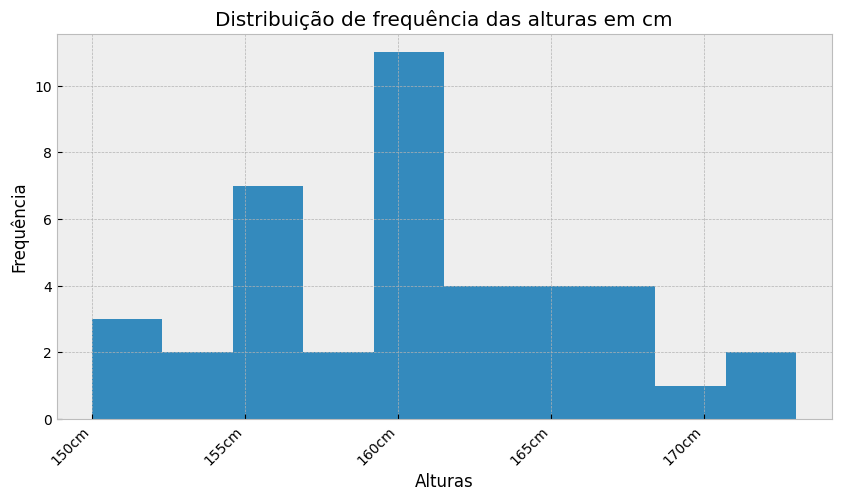

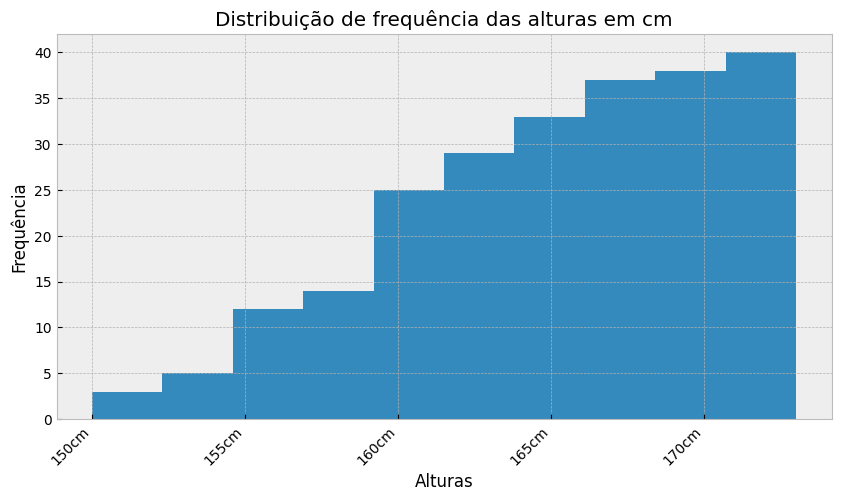

In [6]:
# plt.rcParams.update({'figure.autolayout': True}) # cria espaço para os itens que possam ficar fora do gráfico
with plt.style.context('bmh'):
  fig, ax = plt.subplots(figsize = (10,5))
  ax.hist(alturas)

  ## reorientação dos dados

  labels = ax.get_xticklabels() ## pega os dados do eixo X
  plt.setp(labels, rotation=45, horizontalalignment='right') ## muda a horientação das informações

  ## Legendas

  ax.set(xlabel = "Alturas", ylabel="Frequência", title = "Distribuição de frequência das alturas em cm")
  ax.xaxis.set_major_formatter(centimeter) # utilizamos o retono da função centimeter para alterar o nosso eixo x

  ## GRÁFICO ACUMULADO

  fig, ax2 = plt.subplots(figsize = (10,5))
  ax2.hist(alturas, cumulative=True)

  ## reorientação dos dados

  labels = ax2.get_xticklabels() ## pega os dados do eixo X
  plt.setp(labels, rotation=45, horizontalalignment='right') ## muda a horientação das informações

  ## Legendas

  ax2.set(xlabel = "Alturas", ylabel="Frequência", title = "Distribuição de frequência das alturas em cm")
  ax2.xaxis.set_major_formatter(centimeter) # utilizamos o retono da função centimeter para alterar o nosso eixo x

  plt.grid(True);
plt.show()

## Adicionando a média e a mediana no gráfico

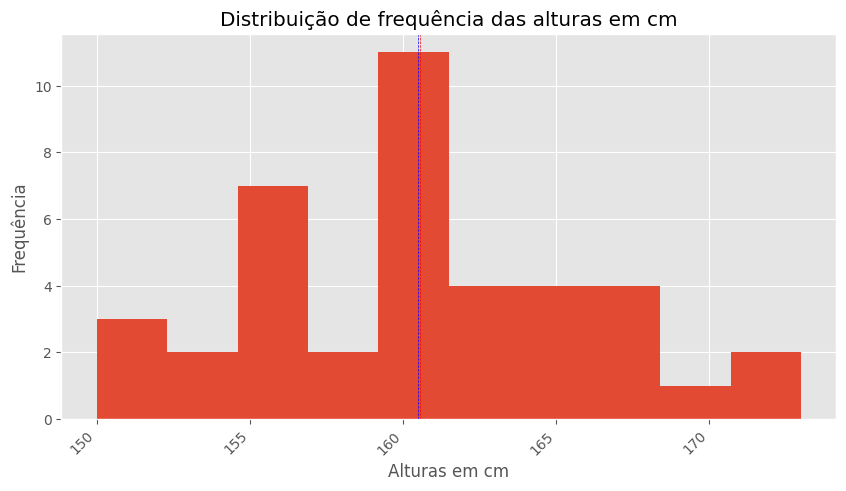

In [19]:
## COMBINANDO MÚLTIPLAS VISUALIZAÇÕES
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(alturas)

## reorientação dos dados

labels = ax.get_xticklabels() ## pega os dados do eixo X
plt.setp(labels, rotation=45, horizontalalignment='right') ## muda a horientação das informações

# Add a vertical line, here we set the style in the function call
ax.axvline(np.median(alturas), ls='--', color='b') ## utilizamos aqui a mediana das alturas
ax.axvline(np.mean(alturas), ls='--', color='r') ## utilizamos aqui a média das alturas
# mpl.rc('lines', linewidth=.5, linestyle='-.')

## Legendas

ax.set(xlabel = "Alturas em cm", ylabel="Frequência", title = "Distribuição de frequência das alturas em cm")

plt.grid(True);

# **Customizing Matplotlib with style sheets and rcParams**

## 1. **Runtime rc settings**

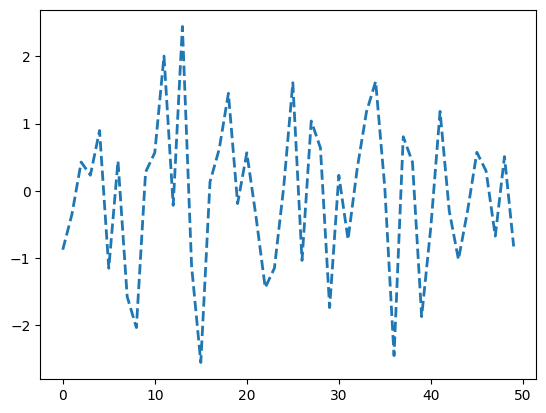

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

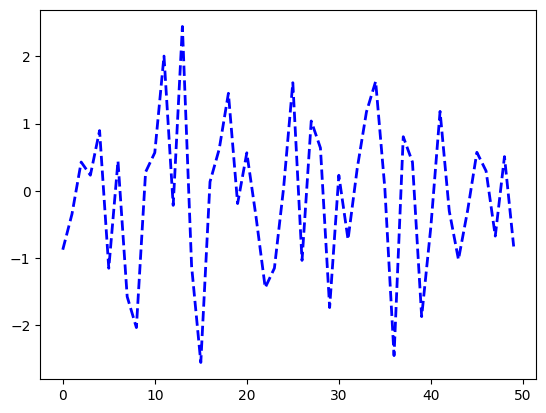

In [9]:
# para mudar a cor
mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'r', 'g'])
plt.plot(data)  # first color is blue

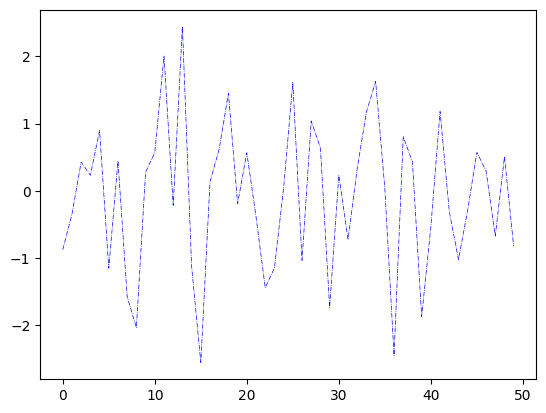

In [10]:
mpl.rc('lines', linewidth=.5, linestyle='-.')
plt.plot(data)

## 2. **Using style sheets**

In [11]:
## ggplot2 style
plt.style.use('ggplot')

In [12]:
## Estilos disponíveis
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


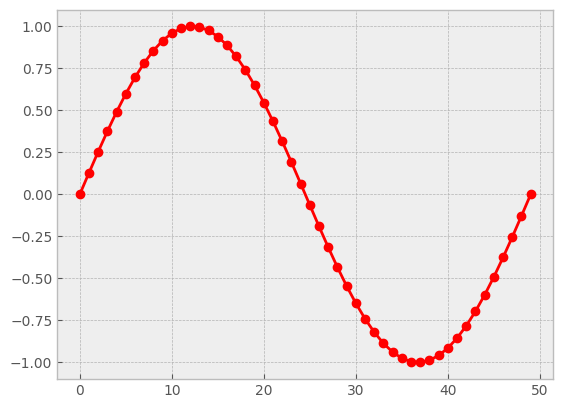

In [13]:
with plt.style.context('bmh'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

# **Artist tutorial**

There are three layers to the Matplotlib API.

1. the matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn

2. the matplotlib.backend_bases.Renderer is the object which knows how to draw on the FigureCanvas

3. the matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas.

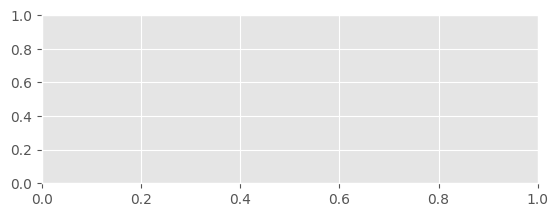

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

The Axes is probably the most important class in the Matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods (plot(), text(), hist(), imshow()) to create the most common graphics primitives (Line2D, Text, Rectangle, AxesImage, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

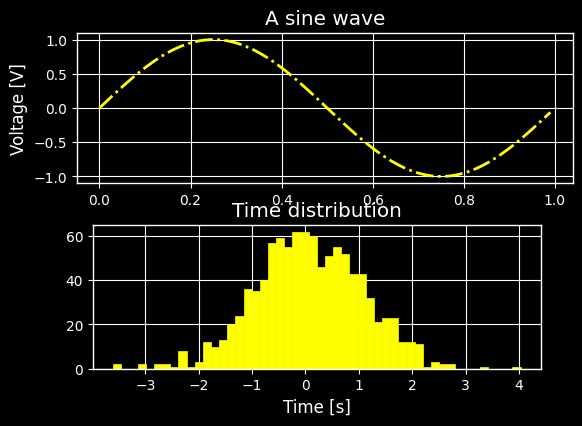

In [15]:
import numpy as np
import matplotlib.pyplot as plt


with plt.style.context('dark_background'):

  # GRÁFICO 1 (CIMA)
  fig = plt.figure()
  fig.subplots_adjust(top=0.8)
  ax1 = fig.add_subplot(211)
  ax1.set_ylabel('Voltage [V]')
  ax1.set_title('A sine wave')

  t = np.arange(0.0, 1.0, 0.01)
  s = np.sin(2*np.pi*t)
  line, = ax1.plot(t, s, color='yellow', lw=2)

  # Fixing random state for reproducibility
  np.random.seed(19680801)

  ## GRÁFICO 2 (BAIXO)
  ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
  n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
  ax2.set_xlabel('Time [s]')
  ax2.set_title('Time distribution')

plt.show();

In [16]:
import matplotlib

print(matplotlib.artist.getp(fig.patch))

    agg_filter = None
    alpha = None
    angle = 0.0
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    center = [0.5 0.5]
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    corners = [[0. 0.]  [1. 0.]  [1. 1.]  [0. 1.]]
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (0.0, 0.0, 0.0, 1.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=640.0, y1=480.0)
    facecolor or fc = (0.0, 0.0, 0.0, 1.0)
    figure = Figure(640x480)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    mouseover = False
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = False
    sketch_params = None
    

Now that we know how to inspect and set the properties of a given object we want to configure, we need to know how to get at that object. As mentioned in the introduction, there are two kinds of objects: primitives and containers. The primitives are usually the things you want to configure (the font of a Text instance, the width of a Line2D) although the containers also have some properties as well -- for example the Axes Artist is a container that contains many of the primitives in your plot, but it also has properties like the xscale to control whether the xaxis is 'linear' or 'log'. In this section we'll review where the various container objects store the Artists that you want to get at.